<a href="https://colab.research.google.com/github/JustinhSE/ML-Research/blob/main/spam_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/ML Research'

Mounted at /content/drive
/content/drive/My Drive/ML Research


logisitic regression

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('research.csv')

In [ ]:
X = df['v2']
y = df['v1']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_transformed = vectorizer.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



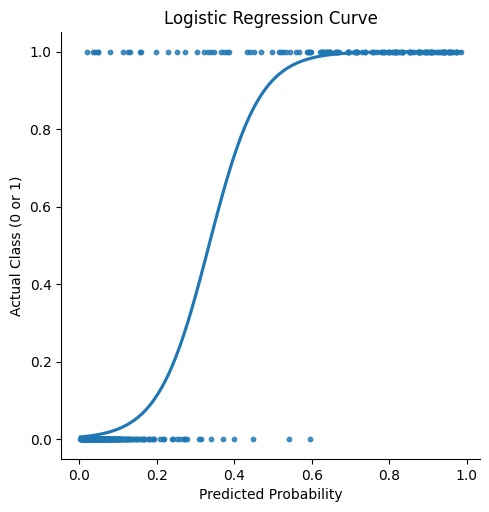

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a trained model 'model' and test data 'X_test'
probas = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Create a dataframe with predicted probabilities and actual classes
results_df = pd.DataFrame({'Predicted_Probability': probas, 'Actual_Class': y_test})

# Plot the logistic regression curve
sns.lmplot(x='Predicted_Probability', y='Actual_Class', data=results_df, logistic=True, ci=None, scatter_kws={'s': 10})
plt.xlabel('Predicted Probability')
plt.ylabel('Spam/Legit')
plt.title('Logistic Regression Curve')
plt.show()


---

naive bayes

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



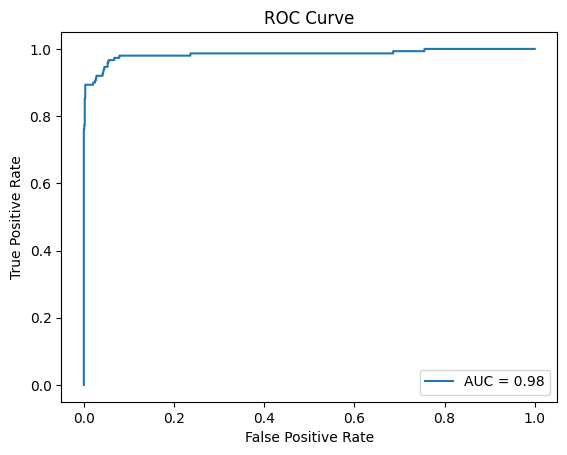

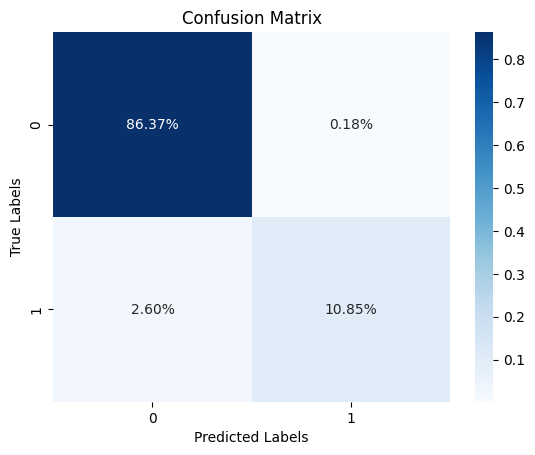

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from wordcloud import WordCloud

# Load the data from 'research.csv'
df = pd.read_csv('research.csv')

# Split variables into X (text messages) and y (target labels)
X = df['v2']  # Adjust column name if needed
y = df['v1']  # 0 for legit, 1 for spam

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Transform text data into numerical features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))


# ROC Curve
y_pred_proba = nb_classifier.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix Heatmap
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#slides - true positive, false positive, precision, recall, f1-score, accuracy, confusion matrix


Word Embeddings and KNN

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


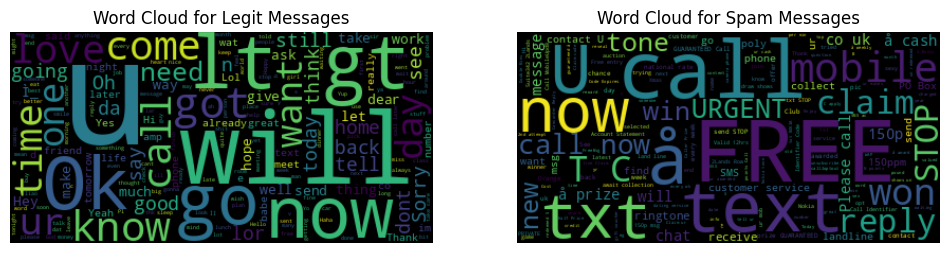

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the data from 'research.csv'
df = pd.read_csv('research.csv')

# Split variables into X (text messages) and y (target labels)
X = df['v2']  # Adjust column name if needed
y = df['v1']  # 0 for legit, 1 for spam

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Word embeddings
word2vec_model = Word2Vec(sentences=X, vector_size=100, window=5, min_count=1, sg=1)

# K-Means clustering for legit (0) and spam (1) separately
kmeans_legit = KMeans(n_clusters=3, random_state=42)
kmeans_spam = KMeans(n_clusters=3, random_state=42)

# Fit K-Means on legit and spam text messages
kmeans_legit.fit(word2vec_model.wv.vectors)
kmeans_spam.fit(word2vec_model.wv.vectors)

# Word cloud for legit and spam themes
wordcloud_legit = WordCloud().generate(' '.join(X[y == 0]))
wordcloud_spam = WordCloud().generate(' '.join(X[y == 1]))

# Visualize word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_legit, interpolation='bilinear')
plt.title('Word Cloud for Legit Messages')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis("off")

plt.show()

#message length and seeing if message length has correlation being spam or legit text. Spam texts are more lengthy vs what i get from a friend

most common phrases


In [ ]:
import pandas as pd
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def preprocess_text(text):
    # Remove special characters, punctuation, and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    return " ".join(filtered_tokens)



# Load the data from 'research.csv'
df = pd.read_csv('research.csv')

# Assuming you've already defined the preprocess_text function
df["cleaned_text"] = df["v2"].apply(preprocess_text)


# Filter legit and spam messages
legit_messages = df[df['v1'] == 0]['cleaned_text']
spam_messages = df[df['v1'] == 1]['cleaned_text']

# Tokenize and count phrases
def get_phrases(messages, n=2):
    phrases = []
    for message in messages:
        tokens = word_tokenize(message.lower())  # Tokenize and lowercase
        ngram_tokens = ngrams(tokens, n)
        phrases.extend([' '.join(gram) for gram in ngram_tokens])
    return phrases

# Get most common phrases (change n as needed)
n = 2  # Change to 3 for trigrams, etc.
legit_phrases = get_phrases(legit_messages, n)
spam_phrases = get_phrases(spam_messages, n)

# Find most common phrases
top_legit_phrases = Counter(legit_phrases).most_common(20)
top_spam_phrases = Counter(spam_phrases).most_common(20)

print("Top Legit Phrases:")
for phrase, count in top_legit_phrases:
    print(f"{phrase}: {count}")

print("\nTop Spam Phrases:")
for phrase, count in top_spam_phrases:
    print(f"{phrase}: {count}")

    #tackle unbalanced data


AttributeError: module 'nltk' has no attribute 'internals'

In [ ]:

import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter
from nltk.util import ngrams
# from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Load the data from 'research.csv'
df = pd.read_csv('research.csv')


def preprocess_text(text):
    # Remove special characters, punctuation, and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    return " ".join(filtered_tokens)

# Assuming you've already defined the preprocess_text function
df["cleaned_text"] = df["v2"].apply(preprocess_text)



# Convert text to lowercase
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x.lower())

# Tokenize the text
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: word_tokenize(x))

# Apply word embeddings
word2vec_model = Word2Vec(sentences=df['cleaned_text'], vector_size=100, window=5, min_count=1, sg=1)

# Now you can use the word2vec_model for further analysis

word2vec_model.wv.most_similar('spam' , topn=20)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('throat', 0.9681752324104309),
 ('ugh', 0.9670875072479248),
 ('vijay', 0.9670711159706116),
 ('park', 0.9669729471206665),
 ('boost', 0.9668376445770264),
 ('tkts', 0.9667445421218872),
 ('insurance', 0.9665932655334473),
 ('embarassed', 0.9665794968605042),
 ('teacher', 0.9664576053619385),
 ('forever', 0.9664178490638733),
 ('jazz', 0.9664064645767212),
 ('advance', 0.9663746953010559),
 ('wun', 0.9663625359535217),
 ('figure', 0.9662959575653076),
 ('awake', 0.96625155210495),
 ('isnt', 0.9662342071533203),
 ('hv', 0.9661819338798523),
 ('couldnt', 0.9661732316017151),
 ('ym', 0.966155469417572),
 ('men', 0.9661449790000916)]

In [ ]:

# Print the most similar words to "spam"
print(word2vec_model.wv.most_similar('spam' , topn=20))

# Print the similarity score between two words
print(word2vec_model.wv.similarity('spam', 'claim'))

# Find the odd word out in a list of words
print(word2vec_model.wv.doesnt_match(["spam", "scam", "email", "cat"]))

# Find the word vectors for a list of words
vectors = word2vec_model.wv['spam'] + word2vec_model.wv['win'] - word2vec_model.wv['claim']
print(vectors)



# # Train a classifier using word embeddings
# X = [word2vec_model.wv[word] for word in df['cleaned_text']]
# y = df['v1']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = LogisticRegression()
# model.fit(X_train, y_train)
# print(model.score(X_test, y_test))


[('throat', 0.9681752324104309), ('ugh', 0.9670875072479248), ('vijay', 0.9670711159706116), ('park', 0.9669729471206665), ('boost', 0.9668376445770264), ('tkts', 0.9667445421218872), ('insurance', 0.9665932655334473), ('embarassed', 0.9665794968605042), ('teacher', 0.9664576053619385), ('forever', 0.9664178490638733), ('jazz', 0.9664064645767212), ('advance', 0.9663746953010559), ('wun', 0.9663625359535217), ('figure', 0.9662959575653076), ('awake', 0.96625155210495), ('isnt', 0.9662342071533203), ('hv', 0.9661819338798523), ('couldnt', 0.9661732316017151), ('ym', 0.966155469417572), ('men', 0.9661449790000916)]
0.7056156
spam
[ 0.10374437 -0.02072036 -0.2311044  -0.00068686  0.22957478  0.14524937
  0.03931647  0.00265852  0.05983311 -0.0329656  -0.3354354  -0.20330615
 -0.24885678 -0.15899697 -0.0189485  -0.03886914  0.00408882 -0.09611388
  0.24626824  0.1425497   0.0322543   0.08981641  0.01047286 -0.10533503
  0.15707581 -0.11324672  0.06463374 -0.2225074   0.19173458 -0.02274023

In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load pre-trained word embeddings (e.g., 'en_core_web_md' for medium-sized vectors)
nlp = spacy.load('en_core_web_sm')

# Load data from CSV
df = pd.read_csv('research.csv')

# Preprocess text and convert to word vectors
def get_word_vectors(text):
    doc = nlp(text)
    return doc.vector

df['word_vectors'] = df['v2'].apply(get_word_vectors)

# Split data into train and test sets
X = pd.DataFrame(df['word_vectors'].tolist())
y = df['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.96


In [ ]:
!pip install nltk
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter
from nltk.util import ngrams
# from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Load the data from 'research.csv'
df = pd.read_csv('research.csv')


def preprocess_text(text):
    # Remove special characters, punctuation, and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    return " ".join(filtered_tokens)

# Assuming you've already defined the preprocess_text function
df["cleaned_text"] = df["v2"].apply(preprocess_text)



# Convert text to lowercase
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x.lower())

# Tokenize the text
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: word_tokenize(x))

# Apply word embeddings
word2vec_model = Word2Vec(sentences=df['cleaned_text'], vector_size=100, window=5, min_count=1, sg=1)

# Now you can use the word2vec_model for further analysis

word2vec_model.wv.most_similar('spam' , topn=20)




AttributeError: module 'nltk' has no attribute 'internals'

In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch

# Load the data from 'research.csv'
df = pd.read_csv('research.csv')

# Preprocess text
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    return " ".join(filtered_tokens)

df["cleaned_text"] = df["v2"].apply(preprocess_text)



KeyboardInterrupt: 

In [ ]:
import pandas as pd
import re
import nltk
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the data from 'research.csv'
df = pd.read_csv('research.csv')

# Preprocess the text in column 'v2'
def preprocess_text(text):
  text = re.sub(r"[^a-zA-Z\s]", "", text)
  text = text.lower()
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words("english"))
  filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
  return " ".join(filtered_tokens)

df["cleaned_text"] = df["v2"].apply(preprocess_text)

# Apply Bag of Words on the preprocessed text
bow_vectorizer = CountVectorizer()
bow_features = bow_vectorizer.fit_transform(df["cleaned_text"])

# Apply LSTM on the Bag of Words features
max_features = 1000
max_length = 100

X = pad_sequences(bow_features.toarray(), maxlen=max_length)
y = df["v1"]

model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X, y, epochs=10, batch_size=32)

print(model.summary())

AttributeError: module 'nltk' has no attribute 'internals'

LSTM Units (Long Short-Term Memory Units):
LSTM is a type of recurrent neural network (RNN) architecture.
LSTM units are the fundamental building blocks of an LSTM layer.
Each LSTM unit maintains an internal state (cell state) that allows it to capture long-term dependencies in sequential data.
The number of LSTM units in a layer determines its capacity to learn complex patterns.
More units allow the model to capture finer details but may also increase computational complexity.
In Keras (a popular deep learning library), you can set the number of LSTM units using the units parameter.

Dropout:
Dropout is a regularization technique used to prevent overfitting in neural networks.
During training, dropout randomly sets a fraction of input units (neurons) to zero.
This helps prevent the model from relying too heavily on specific neurons and encourages robustness.
The dropout rate (usually between 0 and 1) determines the proportion of units to drop.
In Keras, you can add dropout layers using Dropout(rate).

Recurrent Dropout:
Recurrent dropout is a variant of dropout specifically designed for RNNs (including LSTMs).
It applies dropout to the recurrent connections (i.e., connections between time steps).
Regular dropout is not directly applicable to recurrent connections due to their sequential nature.
Recurrent dropout helps prevent overfitting in RNNs.
In Keras, you can set the recurrent dropout rate using the recurrent_dropout parameter in the LSTM layer.

In summary:

LSTM Units: Control the capacity and complexity of the LSTM layer.
Dropout: Prevents overfitting by randomly dropping input units during training.
Recurrent Dropout: Specifically addresses dropout for recurrent connections in RNNs.

AttributeError: module 'nltk' has no attribute 'internals'